In [1]:
import json
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Hypothèses:

 - Les nombres vont de 1 à 75
 - Lignes, colonnes et diagonales permettent de gagner
 - Les chances de gagner sont fonctions du nombre de carte en jeu et du nombre de tirage
 - Il faut minimum 4 tirage pour avoir un gagnant
 - La carte la plus remplie non gagnante est cochée 19 fois maximum (à 20 il y a d'office un bingo)
 - Il existe un joueur qui n'a rien coché après 30 tirages
 - 30 est un nombre élevé de tirage sans gagnant
 
 - Alice et Bob ont un Bingo ou un (Bingo -1) au 30 ème tirage (mais quel type de bingo, pourquoi écossais, généralement on tire 12 numéro au bingo classique)

$$ C(19, 75) = 2.868457137478833 \times 10^{17} $$
$$ C(30, 75) = 7.8187943062594297688 \times 10^{20}$$
$$ 75! = 2.4809140811395398 \times 10^{109}$$

### References

 - https://en.wikipedia.org/wiki/Bingo_(American_version)
 - https://www.playsmart.ca/charitable-centre-games/bingo/odds/
 - http://www.durangobill.com/BingoHowTo.html
 - https://wizardofodds.com/ask-the-wizard/bingo/
 - https://www.wolframalpha.com/input/?i=C%2875%2C+30%29

In [2]:
def spacer(l):
    return l[:12] + [0] + l[12:]

In [3]:
with open("SGRS2020_Task25_data.json") as fh:
    data = json.load(fh)

In [4]:
C = collections.Counter()
for k in data:
    C.update(data[k])

In [5]:
dist= pd.DataFrame([(k,v) for k,v in C.items()], columns=['number', 'count']).set_index('number').sort_index()

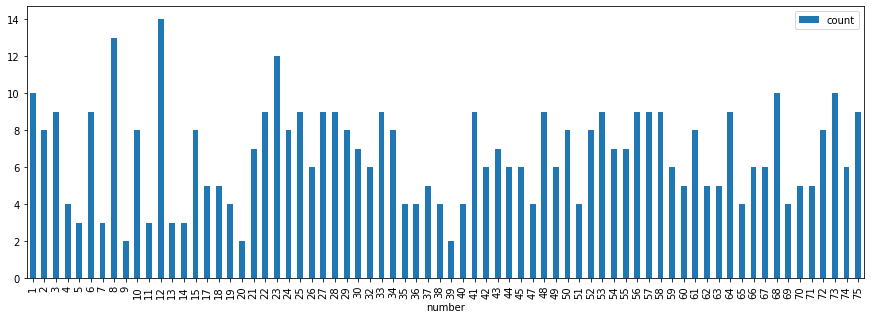

In [6]:
dist.plot(kind='bar', figsize=(15,5))

In [7]:
All = set(range(1, 76))
print(All)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75}


In [8]:
All.difference(set(dist.index))

{16, 31, 46}

In [9]:
def matrix(l):
    return np.array(spacer(l)).reshape((5,5)).T

In [10]:
def marker(m, n, inplace=False):
    if not inplace:
        m = np.array(m)
    for i in n:
        c = np.where(m == i)
        if c[0].size > 0:
            m[c[0][0],c[1][0]] = 0
    return m

In [11]:
def check(m):
    for k in range(5):
        col = np.sum(m[:,k]<=0)
        row = np.sum(m[k,:]<=0)
        if (col == 5) or (row == 5):
            return True
    d1 = np.sum(np.array([m[k,k] for k in range(5)])<=0)
    d2 = np.sum(np.array([m[k,5-k-1] for k in range(5)])<=0)
    if (d1 == 5) or (d2 == 5):
            return True
    else:
        return False

In [12]:
A = matrix(data['Alice'])
A

array([[ 2, 19, 34, 47, 61],
       [ 3, 23, 37, 48, 64],
       [10, 24,  0, 53, 68],
       [12, 25, 41, 56, 72],
       [15, 30, 43, 57, 73]])

In [13]:
Am = marker(A, [1,2,3])
Ac = check(Am)
print(Am, Ac)

[[ 0 19 34 47 61]
 [ 0 23 37 48 64]
 [10 24  0 53 68]
 [12 25 41 56 72]
 [15 30 43 57 73]] False


In [14]:
Am = marker(A, [2,3,10,12,15])
Ac = check(Am)
print(Am, Ac)

[[ 0 19 34 47 61]
 [ 0 23 37 48 64]
 [ 0 24  0 53 68]
 [ 0 25 41 56 72]
 [ 0 30 43 57 73]] True


In [15]:
Am = marker(A, [3,23,37,48,64])
Ac = check(Am)
print(Am, Ac)

[[ 2 19 34 47 61]
 [ 0  0  0  0  0]
 [10 24  0 53 68]
 [12 25 41 56 72]
 [15 30 43 57 73]] True


In [16]:
Am = marker(A, [2,23,56,73])
Ac = check(Am)
print(Am, Ac)

[[ 0 19 34 47 61]
 [ 3  0 37 48 64]
 [10 24  0 53 68]
 [12 25 41  0 72]
 [15 30 43 57  0]] True


In [17]:
Am = marker(A, [15,25,48,61])
Ac = check(Am)
print(Am, Ac)

[[ 2 19 34 47  0]
 [ 3 23 37  0 64]
 [10 24  0 53 68]
 [12  0 41 56 72]
 [ 0 30 43 57 73]] True


In [18]:
def MonteCarlo(numbers, n=30, N=100, data=data):
    MC = collections.Counter()
    for i in range(N):
        setup = np.random.choice(list(numbers), size=n, replace=False)
        stats = dict()
        for k in data:
            stats[k] = check(marker(matrix(data[k]), setup))
        MC.update(stats)
    df = pd.DataFrame([(k,v) for k,v in MC.items()], columns=['player', 'count']).set_index('player')
    df['frequency'] = df['count'].astype(float)/float(N)
    return df

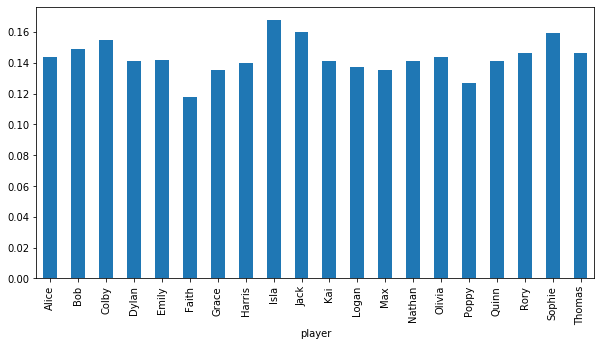

In [19]:
distY = MonteCarlo(All, N=1000)
distY['frequency'].plot(kind='bar', figsize=(10,5))

In [20]:
def gen():
    for k in data:
        for j in data:
            l = set(data[k]).intersection(data[j])
            yield (k, j, len(l), list(l))

In [21]:
inter = pd.DataFrame(gen(), columns=['player1', 'player2', 'count', 'intersection'])
inter.sample(5)

,player1,player2,count,intersection
395,Thomas,Poppy,10,"[6, 8, 43, 12, 15, 22, 23, 24, 54, 58]"
250,Max,Kai,7,"[32, 33, 8, 42, 50, 54, 27]"
110,Faith,Kai,10,"[33, 66, 67, 11, 13, 14, 56, 57, 27, 28]"
91,Emily,Logan,12,"[8, 41, 72, 74, 12, 45, 53, 22, 55, 58, 27, 29]"
111,Faith,Logan,9,"[4, 41, 14, 56, 25, 27, 28, 62, 57]"


In [22]:
crossinter = inter.pivot_table(index='player1', columns='player2', values='count')
crossinter

player2,Alice,Bob,Colby,Dylan,Emily,Faith,Grace,Harris,Isla,Jack,Kai,Logan,Max,Nathan,Olivia,Poppy,Quinn,Rory,Sophie,Thomas
player1,,,,,,,,,,,,,,,,,,,,
Alice,24,9,10,7,9,6,11,6,10,7,4,11,10,10,13,12,16,4,13,9
Bob,9,24,7,4,8,8,5,2,18,14,7,4,10,9,7,9,8,7,9,8
Colby,10,7,24,7,8,7,6,11,8,11,6,7,10,6,5,5,7,6,5,5
Dylan,7,4,7,24,12,6,12,14,5,8,10,14,11,10,12,10,7,6,7,13
Emily,9,8,8,12,24,3,9,9,10,6,6,12,11,10,12,11,13,4,9,13
Faith,6,8,7,6,3,24,6,8,9,8,10,9,7,5,6,2,3,10,7,1
Grace,11,5,6,12,9,6,24,8,5,7,5,10,12,12,13,10,10,7,13,9
Harris,6,2,11,14,9,8,8,24,3,8,9,13,8,7,5,5,4,8,6,10
Isla,10,18,8,5,10,9,5,3,24,12,6,5,11,9,7,9,9,6,9,10


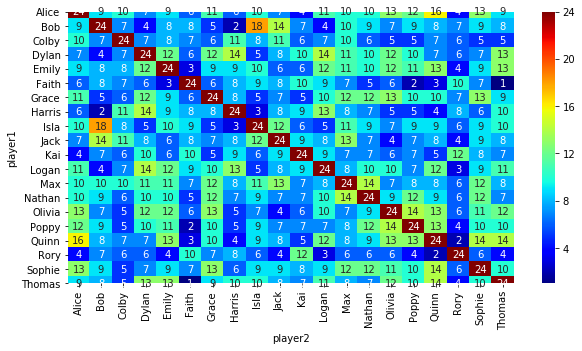

In [23]:
fig, axe = plt.subplots(figsize=(10,5))
sns.heatmap(crossinter, annot=True, ax=axe, cmap='jet')

In [24]:
inter.describe()

,count
count,400.000000
mean,9.215000
std,4.501047
min,1.000000
25%,6.000000
50%,9.000000
75%,11.000000
max,24.000000


In [25]:
inter.loc[inter['count']<24,:].describe()

,count
count,380.000000
mean,8.436842
std,3.030837
min,1.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,18.000000


In [26]:
a1 = set(data["Alice"]).difference(set(data["Quinn"]))
a1

{3, 19, 41, 48, 56, 57, 61, 68}

In [27]:
a2 = set(data["Alice"]).difference(set(data["Olivia"]))
a2

{10, 15, 19, 25, 37, 47, 48, 53, 56, 61, 73}

In [28]:
a3 = set(data["Bob"]).difference(set(data["Isla"]))
a3

{1, 6, 37, 39, 40, 67}

In [29]:
a4 = set(data["Bob"]).difference(set(data["Jack"]))
a4

{2, 12, 17, 21, 24, 40, 53, 65, 67, 68}

In [30]:
A = a1.union(a2, a3, a4)
print(A)

{1, 65, 3, 68, 67, 6, 2, 73, 10, 12, 15, 17, 19, 21, 24, 25, 37, 39, 40, 41, 47, 48, 53, 56, 57, 61}


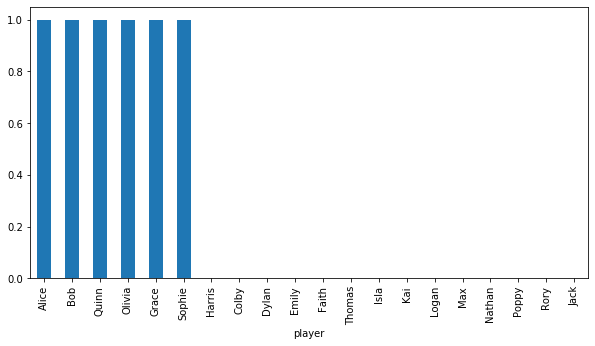

In [31]:
distZ = MonteCarlo(A, n=26, N=1000)
distZ['frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [32]:
a5 = set(data["Quinn"]).intersection(set(data["Olivia"]))

In [33]:
A = All.difference(a5).difference(set(data["Bob"]).intersection(set(data["Isla"])))
len(A)

48

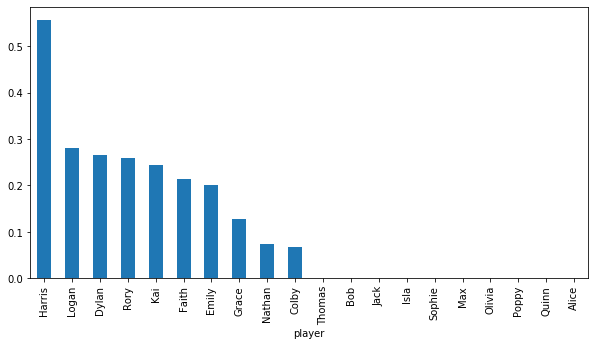

In [34]:
distZ = MonteCarlo(A, n=30, N=1000)
distZ['frequency'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [35]:
dep = pd.read_excel('SGRS2020_Task25_depprob_N100000.xlsx', index_col=0)
dep

,player,count,frequency,without
0,Alice,0,0.00000,Alice
1,Bob,11075,0.11075,Alice
2,Colby,6096,0.06096,Alice
3,Dylan,6085,0.06085,Alice
4,Emily,6123,0.06123,Alice
...,...,...,...,...
395,Poppy,6083,0.06083,Thomas
396,Quinn,0,0.00000,Thomas
397,Rory,29939,0.29939,Thomas
398,Sophie,10780,0.10780,Thomas


In [36]:
crossdep = dep.pivot_table(index='without', columns='player', values='frequency')
crossdep

player,Alice,Bob,Colby,Dylan,Emily,Faith,Grace,Harris,Isla,Jack,Kai,Logan,Max,Nathan,Olivia,Poppy,Quinn,Rory,Sophie,Thomas
without,,,,,,,,,,,,,,,,,,,,
Alice,0.00000,0.11075,0.06096,0.06085,0.06123,0.21259,0.10973,0.11803,0.11077,0.00000,0.25945,0.16022,0.10978,0.06002,0.00000,0.00000,0.00000,0.29988,0.10939,0.21000
Bob,0.00000,0.00000,0.21241,0.30437,0.16069,0.06080,0.21133,0.41162,0.00000,0.00000,0.29324,0.41159,0.00000,0.05992,0.16455,0.00000,0.06150,0.29352,0.00000,0.25898
Colby,0.06036,0.25658,0.00000,0.06026,0.05930,0.21060,0.20824,0.15907,0.10922,0.00000,0.25417,0.16007,0.00000,0.20836,0.06031,0.30061,0.00000,0.21020,0.25412,0.26032
Dylan,0.16187,0.33732,0.21248,0.00000,0.00000,0.16919,0.11067,0.00000,0.25408,0.00000,0.00000,0.00000,0.00000,0.06052,0.00000,0.06188,0.21179,0.16092,0.25390,0.11005
Emily,0.06079,0.10818,0.16496,0.00000,0.00000,0.37108,0.00000,0.06020,0.00000,0.20690,0.16361,0.00000,0.00000,0.06109,0.00000,0.00000,0.00000,0.15967,0.00000,0.00000
Faith,0.26016,0.20828,0.29728,0.21978,0.37763,0.00000,0.33562,0.21175,0.20666,0.20984,0.06179,0.00000,0.25672,0.29557,0.33571,0.47471,0.44760,0.11057,0.17114,0.52855
Grace,0.06150,0.29685,0.16250,0.16074,0.06011,0.21137,0.00000,0.16168,0.25211,0.21205,0.21059,0.16075,0.00000,0.00000,0.00000,0.06036,0.06097,0.16396,0.00000,0.05869
Harris,0.21116,0.44379,0.15965,0.00000,0.16601,0.10951,0.16167,0.00000,0.29770,0.06043,0.00000,0.00000,0.05976,0.15977,0.11640,0.20965,0.20803,0.16190,0.16620,0.10898
Isla,0.00000,0.00000,0.00000,0.29707,0.06144,0.20925,0.25425,0.37931,0.00000,0.00000,0.20997,0.21002,0.00000,0.06086,0.17035,0.00000,0.06032,0.20992,0.10997,0.11488


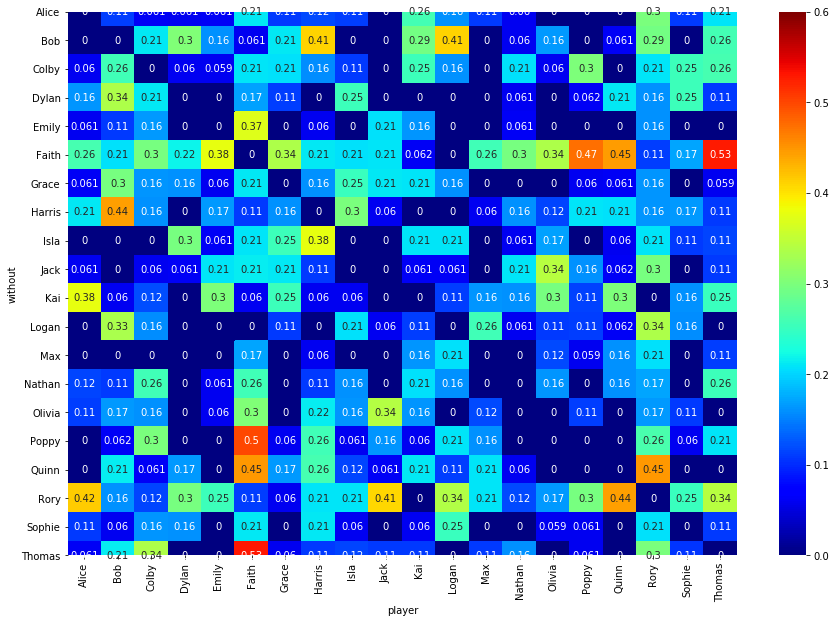

In [37]:
fig, axe = plt.subplots(figsize=(15,10))
sns.heatmap(crossdep, annot=True, ax=axe, vmin=0, vmax=0.6, cmap='jet')

In [38]:
dep.describe()

,count,frequency
count,400.000000,400.000000
mean,12478.460000,0.124785
std,11986.163237,0.119862
min,0.000000,0.000000
25%,0.000000,0.000000
50%,10954.500000,0.109545
75%,20986.000000,0.209860
max,53008.000000,0.530080


In [39]:
Gm = (crossdep.values == 0).astype(int)
Gm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0,

In [40]:
import networkx as nx

In [41]:
G = nx.from_numpy_matrix(Gm, create_using=nx.DiGraph)

In [42]:
G = nx.relabel.relabel_nodes(G, {i:k for i, k in enumerate(crossdep.index)} )

In [43]:
posa = nx.circular_layout(G)

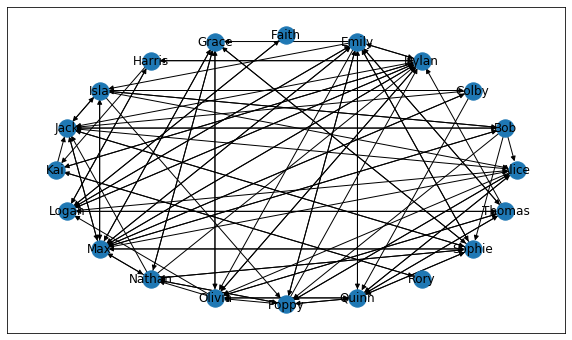

In [44]:
fig, axe = plt.subplots(figsize=(10, 6))
nx.draw_networkx(G, posa, ax=axe)

In [45]:
posb = nx.spring_layout(G, seed=10)

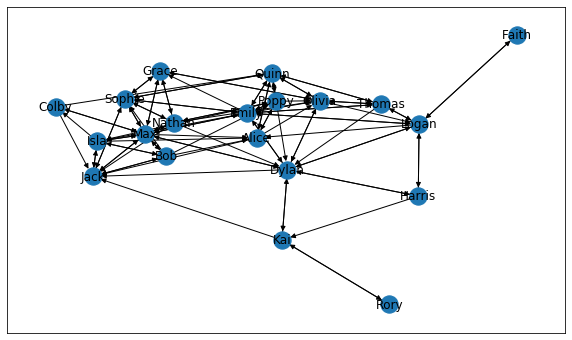

In [46]:
fig, axe = plt.subplots(figsize=(10, 6))
nx.draw_networkx(G, posb, ax=axe)

In [47]:
crossdep.values

array([[0.     , 0.11075, 0.06096, 0.06085, 0.06123, 0.21259, 0.10973,
        0.11803, 0.11077, 0.     , 0.25945, 0.16022, 0.10978, 0.06002,
        0.     , 0.     , 0.     , 0.29988, 0.10939, 0.21   ],
       [0.     , 0.     , 0.21241, 0.30437, 0.16069, 0.0608 , 0.21133,
        0.41162, 0.     , 0.     , 0.29324, 0.41159, 0.     , 0.05992,
        0.16455, 0.     , 0.0615 , 0.29352, 0.     , 0.25898],
       [0.06036, 0.25658, 0.     , 0.06026, 0.0593 , 0.2106 , 0.20824,
        0.15907, 0.10922, 0.     , 0.25417, 0.16007, 0.     , 0.20836,
        0.06031, 0.30061, 0.     , 0.2102 , 0.25412, 0.26032],
       [0.16187, 0.33732, 0.21248, 0.     , 0.     , 0.16919, 0.11067,
        0.     , 0.25408, 0.     , 0.     , 0.     , 0.     , 0.06052,
        0.     , 0.06188, 0.21179, 0.16092, 0.2539 , 0.11005],
       [0.06079, 0.10818, 0.16496, 0.     , 0.     , 0.37108, 0.     ,
        0.0602 , 0.     , 0.2069 , 0.16361, 0.     , 0.     , 0.06109,
        0.     , 0.     , 0.     , 0.1

In [48]:
A = matrix(data["Alice"])
B = matrix(data["Bob"])

In [49]:
def gen_combo(m):
    for k in range(5):
        yield m[:,k]
    for k in range(5):
        yield m[k,:]
    yield np.diag(m)
    yield np.array(list(reversed(np.diag(np.fliplr(m)))))

In [50]:
A

array([[ 2, 19, 34, 47, 61],
       [ 3, 23, 37, 48, 64],
       [10, 24,  0, 53, 68],
       [12, 25, 41, 56, 72],
       [15, 30, 43, 57, 73]])

In [51]:
list(gen_combo(A))

[array([ 2,  3, 10, 12, 15]),
 array([19, 23, 24, 25, 30]),
 array([34, 37,  0, 41, 43]),
 array([47, 48, 53, 56, 57]),
 array([61, 64, 68, 72, 73]),
 array([ 2, 19, 34, 47, 61]),
 array([ 3, 23, 37, 48, 64]),
 array([10, 24,  0, 53, 68]),
 array([12, 25, 41, 56, 72]),
 array([15, 30, 43, 57, 73]),
 array([ 2, 23,  0, 56, 73]),
 array([15, 25,  0, 48, 61])]

In [52]:
B

array([[ 1, 17, 33, 48, 63],
       [ 2, 18, 37, 49, 65],
       [ 6, 21,  0, 50, 66],
       [12, 23, 39, 52, 67],
       [15, 24, 40, 53, 68]])

In [53]:
list(gen_combo(B))

[array([ 1,  2,  6, 12, 15]),
 array([17, 18, 21, 23, 24]),
 array([33, 37,  0, 39, 40]),
 array([48, 49, 50, 52, 53]),
 array([63, 65, 66, 67, 68]),
 array([ 1, 17, 33, 48, 63]),
 array([ 2, 18, 37, 49, 65]),
 array([ 6, 21,  0, 50, 66]),
 array([12, 23, 39, 52, 67]),
 array([15, 24, 40, 53, 68]),
 array([ 1, 18,  0, 52, 68]),
 array([15, 23,  0, 49, 63])]

In [54]:
def banned_combo(m, n=0, data=data):
    for a in gen_combo(m):
        print(a)
        a = set(a)
        for k in data:
            Q = set(data[k]).intersection(a)
            if len(Q) == n:
                print(k)

In [55]:
banned_combo(A)

[ 2  3 10 12 15]
Faith
Harris
Kai
[19 23 24 25 30]
Dylan
Nathan
Rory
[34 37  0 41 43]
Kai
Rory
Sophie
[47 48 53 56 57]
Thomas
[61 64 68 72 73]
Faith
[ 2 19 34 47 61]
Faith
Grace
Jack
Kai
Rory
[ 3 23 37 48 64]
Harris
Nathan
[10 24  0 53 68]
Faith
Harris
Kai
Rory
[12 25 41 56 72]
Rory
[15 30 43 57 73]
Colby
Emily
[ 2 23  0 56 73]
Rory
[15 25  0 48 61]
Dylan
Kai
Olivia


In [56]:
banned_combo(B)

[ 1  2  6 12 15]
Colby
Faith
Kai
Rory
[17 18 21 23 24]
Dylan
Grace
Harris
Logan
[33 37  0 39 40]
Colby
Dylan
Emily
Grace
Harris
Olivia
Thomas
[48 49 50 52 53]
Dylan
Harris
Olivia
[63 65 66 67 68]
Logan
Quinn
Thomas
[ 1 17 33 48 63]
Logan
Poppy
Quinn
[ 2 18 37 49 65]
Dylan
Grace
Harris
Sophie
Thomas
[ 6 21  0 50 66]
Alice
Harris
Quinn
[12 23 39 52 67]
[15 24 40 53 68]
Faith
Harris
[ 1 18  0 52 68]
Colby
Faith
Logan
[15 23  0 49 63]
Dylan
Grace
Harris
Logan
Nathan
Rory


In [57]:
banned_combo(B, n=5)

[ 1  2  6 12 15]
Bob
[17 18 21 23 24]
Bob
Isla
[33 37  0 39 40]
[48 49 50 52 53]
Bob
Isla
[63 65 66 67 68]
Bob
[ 1 17 33 48 63]
Bob
[ 2 18 37 49 65]
Bob
[ 6 21  0 50 66]
[12 23 39 52 67]
Bob
[15 24 40 53 68]
Bob
[ 1 18  0 52 68]
[15 23  0 49 63]


In [58]:
import itertools

In [61]:
for p in itertools.combinations(data, 2):
    L = matrix(data[p[0]])
    R = matrix(data[p[1]])
    for (l, r) in zip(gen_combo(L), gen_combo(R)):
        if all(l == r):
            print(p)
            print(l, r)

('Bob', 'Isla')
[17 18 21 23 24] [17 18 21 23 24]
('Bob', 'Isla')
[48 49 50 52 53] [48 49 50 52 53]
('Colby', 'Harris')
[34 35  0 42 45] [34 35  0 42 45]
('Dylan', 'Harris')
[54 55 56 57 58] [54 55 56 57 58]
('Jack', 'Max')
[48 49 50 52 54] [48 49 50 52 54]
('Max', 'Nathan')
[61 68 72 73 75] [61 68 72 73 75]
